[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/RikVoorhaar/probastat2020/blob/master/notebooks/programmation1.ipynb?hl=fr)

# Série de programmation 1


## Instructions générales

On va utiliser les librairies suivantes. __Evaluer la cellule ci-dessous__ pour l'importer toutes les librairies.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

Si une des librairies n'est pas installée, la cellule ci-dessus donne un `ModuleNotFoundError`. Dans ce cas vous pouvez les installer avec la ligne de commande :

    
```bash
    pip install <logiciel>
```

Si vous utilisez Google Colab ou vous venez d'installer Annaconda, toutes les librairies devraient être déja installées.

__Informations importants pour les exercises__  

* Les solutions des exercices ne font pas plus de 4 lignes. Réévaluer votre réponse s'il est beaucoup plus loin.  
* Redémarrer l'environment d'exécution (anglais : 'kernel') de temps en temps.

* Tous les exercises ont des tests automatiques. Si vous évaluer les tests et ils ne donnent pas d'erreurs, votre réponse est probablement correct.  

* Avant de remettre votre fichier, __redémarrer l'environment d'exécution et exécuter tous la code__. Vérifier que aucun teste donne une erreur.

## Partie 1: Introduction à numpy

Python est un langage interprété, ce qui le rend facile à programmer. Un désavantage est que Python est plus lent que d'autres langages comme C/C++ et Java. La différence particulièrement importante pour des boucles. C'est souvent le cas quand on veut faire des calculs avec des vecteurs ou des matrices (ou des tenseurs). Dans ces cas on peut utiliser des libraires numeriques qui sont basé sur code efficient écrit en C. 

Par exemple on calcule la moyenne d'un million de nombres aléatoires réparti uniformément sur l'intervalle [0,1) avec de la code de Python de base et en utilisant `numpy`.

In [2]:
%%time
import random
N = 1000000
s = 0
for i in range(N):
    s += random.random()
s = s / N
s

CPU times: user 137 ms, sys: 0 ns, total: 137 ms
Wall time: 137 ms


0.500292815490113

In [3]:
%%time
N = 1000000
np.mean(np.random.random(size=N))

CPU times: user 4.98 ms, sys: 3.02 ms, total: 8 ms
Wall time: 7.38 ms


0.5001587085569584

Entre la code Python de base et la code `numpy` il y a un facteur 10 entre les vitesses. Dans ce cas on peut faire encore un dizaine fois d'amélioration par parallélisation, mais cela sort du cadre du cours. Si vous êtes intéressé par la parallélisation en Python, c'est assez facile en utilisant [Numba](https://numba.pydata.org/) ou [Cython](https://cython.org/).

On arrive alors à la règle de base pour ce séries:

_____
>**Règle de base**   
>_Il est interdit d'utilliser les boucles_ `for` _et_ `while`  

_____

### Exercice 1a)

On peut calculer les sommes de tous les colonnes (premier axe) d'une matrice comme ça:

In [4]:
np.random.seed(179) # Fixer la graine aléatoire, ne le changez pas !
A = np.random.normal(size=(8,10))

np.sum(A, axis=0)

array([ 0.06716459,  2.6965451 ,  0.37879613,  5.8154886 , -3.35450221,
        0.73545801, -0.47835095, -0.00911386,  1.84349309,  3.05242514])

_____
> __Exercice 1a)__  
> Calculer les moyennes des lignes de cette matrice `A` et stocker le résultat dans une variable qui est appelée `moyennes`

_____

In [ ]:
# INSÉREZ VOTRE CODE ICI


In [ ]:
### TESTES AUTOMATIQUES
try:
    moyennes
except NameError:
    raise AssertionError("Stocker le résultat dans une variable qui est appelée `moyennes`")
assert type(moyennes)==np.ndarray, "Le resultat n'est pas un numpy array"
assert moyennes.shape == (8,), "Vérifier que vous avez utilisé l'axe correct" 
assert np.sum(moyennes) < 2, "Vérifier que vous calculer la moyenne (pas la somme)"
assert abs(0.051629-moyennes[0])<1e-4, "Vérifier que vous avez utilisé l'axe correct" 

### Exercice 1b)

Si on applique des fonctions comme $\exp$ ou $\cos$ à un array, le résultat est un array de même forme. Par exemple on peut calculer les points $(\cos(t),\sin(t))$ pour 100 valeurs $t\in [0,2\pi)$ comme ça :

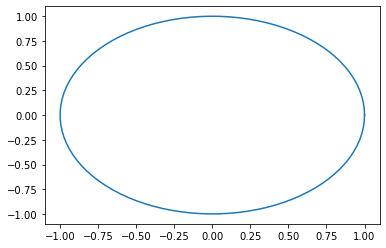

In [5]:
t = np.linspace(0, 2*np.pi, 100)
x = np.cos(t)
y = np.sin(t)

plt.plot(x,y);

_____
> **Exercice 1b)**  

 - Définir un array `x` avec 50 valeurs réparties uniformément entre $[-5,5]$  

 - Calculer $y=\frac{1}{\sqrt{2\pi}}\exp\left(-\frac12 x^2\right)$ pour chaque entrée de `x` et stocker le résultat dans un array qui est appelée `y`.

_____

In [ ]:
# INSÉREZ VOTRE CODE ICI


plt.plot(x,y)

In [ ]:
### TESTES AUTOMATIQUES
assert type(x)==type(y)==np.ndarray, "Le resultat n'est pas un numpy array"
assert abs(np.sum(x)) < 1e-8, "Vérifier que x se compose de valeurs entre -5 et 5"
assert np.min(x) == -5.0, "Vérifier que x se compose de valeurs entre -5 et 5"
assert np.max(x) == 5.0, "Vérifier que x se compose de valeurs entre -5 et 5"
assert len(x) == len(y) == 50, "Vérifier que x et y sont de taille 50"
assert abs(np.sum(y)-4.9) < 1e-4, "Vérifier la définition de y"
assert np.min(y)<1e-4, "Vérifier la définition de y"

### Exercice 1c)

On peut appliquer des comparaisons à des tableaux. Par exemple, on peut vérifier pour chaque élément d'un tableau s'il est positif ou non :

In [6]:
x = np.linspace(-1,1,10)
x > 0

array([False, False, False, False, False,  True,  True,  True,  True,
        True])

Ce nous donne un tableau avec des entrées booléennes. Si l'on calcule la somme des entrées de ce tableau, on obtient le nombre des elements positifs :

In [7]:
np.sum(x>0)

5

On peut aussi utiliser les tableaux booléens pour sélectionner des éléments. Par exemple, on sélectionne les éléments de `x` qui sont plus grand que 0.2 comme ça:

In [8]:
x[x>0.2]

array([0.33333333, 0.55555556, 0.77777778, 1.        ])

______
> **Exercice 1c)**  

 - Considerons le tableau `A` defini ci-dessous  

 - Calculer pour chaque ligne (deuxième axe) le nombre d'entrées qui sont plus grandes que 0.5, stocker le résultat dans un tableau `x`.  

 - Créer un tableau `y` qui contient les entrées de `x` qui sont moins grandes que 5.

_______

In [ ]:
np.random.seed(179) # Fixer la graine aléatoire, ne le changez pas !
A = np.random.random(size=(100,10))

# INSÉREZ VOTRE CODE ICI


In [ ]:
### TESTES AUTOMATIQUES
assert type(x) == type(y) == np.ndarray, "Le resultat n'est pas un numpy array"
assert np.shape(x) == (100,), "Vérifier que vous avez utilisé l'axe correct"
assert np.shape(y) == (37,), "Vérifier la définition de y" 
assert np.sum(x) == 507, "Vérifier la définition de x" 
assert np.sum(y) == 129, "Vérifier la définition de y"

## Partie 2: Échantillonnage à partir de distributions

________
    
> **N.B.**  
> _Dans ces exercices vous pouvez seulement utiliser_ `np.random.random` _comme source des nombres pseudo-aléatoires._  
    
________

Quand on veut faire des simulations de modèles statistiques, on a souvent besoin d'échantillons aléatoires à partir de certaines distributions. À la base de échantillonnage est un générateur de nombres pseudo-aléatoires. Avec un tel générateur on peut générer des nombres aléatoires à partir de distribution uniforme sur [0,1). Nous ne discuterons pas de comment les nombres aléatoires sont générés, et nous nous concentrerons sur comment transformer les échantillons à partir de [0,1) à certaines distributions.

Par exemple, considérons la distribution de Bernoulli. Si $Y$ est de Bernoulli avec paramètre $0\leq p\leq 1$ alors

$$
    P(Y=1) = p,\qquad P(Y=0) = 1-p
$$

Si $X\sim U(0,1)$ est uniforme, on peut alors définir

$$
    Z:=\left\{\begin{matrix}1 &\text{si } X\leq p\\ 0 & \text{si } X>p\end{matrix}\right.
$$

On calcule

$$
\begin{align}
    P(Z=1) &= P(0\leq X\leq p) = p\\
    P(Z=0) &= P(p<X\leq 1) = 1-p
\end{align}
$$

On conclut alors que $Z$ est de Bernoulli. Ce nous donne une recette pour générer des échantillons de Bernoulli: nous générons des nombres de manière uniforme, et puis nous vérifons lesquels sont plus grand que $p$. En code :

In [9]:
def bernoulli(p, N):
    """Générer un échantillon de taille `N` à partir de Bernoulli 
    avec paramètre `p`"""
    
    # Générer N nombres aléatoires uniformes
    x = np.random.random(size=N)
    
    # Vérifons lesquels sont plus grand que p
    # Convertir le resultat vers un tableau d'entiers et renvoie
    return (x>p).astype(int)

bernoulli(0.3, 10)

array([1, 0, 1, 1, 0, 1, 0, 1, 1, 0])

### Exercice 2a) Loi binomiale

Un variable aléatoire bionomial $X\sim \operatorname{Bin}(n,p)$ est une somme des $n$ variables de Bernoulli avec paramètres $p$. On peut donc générer un échantillon binomial par générer un échantillon de distribution uniforme de taille $n$, et puis compter combien sont moins grand que $p$. 

_____
> **Exercice 2a)**  
> Écrire une fonction `binomial(n, p, N)` qui génère un échantillon de $\operatorname{Bin}(n,p)$ de taille $N$.  
> Vous pouvez générer un échantillon uniforme de taille $n\times N$ en utilisant  
```
    np.random.random(size=(n, N))
```
> Si votre réponse est correcte, le densité empirique et théorique dans le graphe ci-dessous doivent être proche.

_____

In [ ]:
def binomial(n, p, N):
    """Générer un échantillon binomial de taille `N` et 
    paramètres `n` et `p`"""
    
    # INSÉREZ VOTRE CODE ICI
    

N=100000
n=10
p=0.4

plt.plot(np.bincount(binomial(n, p, N)) / N, '.', label='densité empirique')
k = np.arange(n+1)
plt.plot(k, scipy.special.binom(n,k) * (p**k) * (1-p)**(n-k), label='densité théorique')
plt.legend();

In [ ]:
### TESTES AUTOMATIQUES
np.random.seed(179)
sample = binomial(10,0.3,100000)
assert type(sample)==np.ndarray, "La résultat n'est pas un numpy array"
assert sample.shape == (100000,), "La taille de échantillon n'est pas correcte"
assert abs(np.mean(sample)-3) < 1e-2, "Vérifier que votre implementation est correcte"
assert abs(np.std(sample)-np.sqrt(10*0.3*0.7)) < 1e-2, "Vérifier que votre implementation est correcte"

### Exercice 2b) Loi normale

La loi normale standard est omniprésente dans la statistique. La densité de la loi normale est donnée par

$$
    f(x) = \frac{1}{\sqrt{2\pi}}\exp\left(-\frac12 x^2\right)
$$

On peut générer un échantillon normal en utilisant la transformation de Box-Muller. Soient $X$ et $Y$ deux variables aléatoires indépendantes uniformes. Définisons la transformation de Box-Muller de $X$ et $Y$ par

$$
    Z = R\cos\theta =\sqrt{-2\log(X)}\cos(2\pi Y)
$$

On peut prouver que $Z$ suit une loi normale [(lire cette page Wikipedia pour plus des informations)](https://fr.wikipedia.org/wiki/M%C3%A9thode_de_Box-Muller)

_____
>**Exercice 2b)**     
> Écrivez une fonction `normal(N)` qui donne un échantillon de taille `N` de loi normale, en utilisant la transformation de Box-Muller.  
> Utilisez deux échantillons de loi uniforme par échantillion de loi normale.  
> Si votre réponse est correcte, les densités théorique et empirique dans le graphe ci-dessous doivent être proche.

_____

In [ ]:
def normal(N):
    """Générer un échantillon de taille `N` de la loi normale"""
    # INSÉREZ VOTRE CODE ICI
    

x = np.linspace(-5,5,100)
plt.plot(x, np.exp(-x**2/2)/np.sqrt(np.pi*2), label='densité théorique')
sns.kdeplot(normal(100000), label='densité empirique')
plt.legend();

In [ ]:
### TESTES AUTOMATIQUES
np.random.seed(179)
sample = normal(100000)
assert type(sample)==np.ndarray, "La résultat n'est pas un numpy array"
assert sample.shape == (100000,), "La taille de échantillon n'est pas correcte"
assert abs(np.mean(sample)) < 1e-2, "Vérifier que votre implementation est correcte"
assert abs(np.std(sample)-1) < 1e-2, "Vérifier que votre implementation est correcte"

### Exercice 2c) Loi exponentielle

La densité de la loi exponentielle avec paramètre $\lambda$ est donnée par

$$
    f(x) = \lambda \exp(-\lambda x)
$$

Pour l'échantillonner, on utilise la fonction de répartition $F\colon [0,\infty)\to [0,1]$ :

$$
    F(x) = \int_{-\infty}^x\! f(t)\,\mathrm dt = 1-\exp(-\lambda x)
$$

Soit $X$ une variable aléatoire qui suit la loi exponentielle, alors

$$
    P(X<t) = F(t)
$$

Si $Y$ est une variable aléatoire qui suit la loi uniforme sur $[0,1]$, on peut définir $Z$ par

$$
    Z = F^{-1}(Y)
$$

On calcule :

$$
    P(Z<t) = P(F^{-1}(Y) < t) = P(Y < F(t)) = F(t)
$$

on conclut alors que $Z$ est de la loi exponentielle. En général, si $F$ est la fonction de répartition d'une loi, la variable $Z=F^{-1}(Y)$ est de la même loi si $Y$ est une variable aléatoire de la loi uniforme sur $[0,1]$.

_____
> **Exercice 2c)**  

 - Trouvez un expression pour la inverse $F^{-1}(t)$ de la fonction de répartition de la loi exponentielle. Ecrivez le dans un cellule de markdown ci-dessous.  

 - Écrivez une fonction `exponential(lam, N)` qui donne une échantillon de la loi exponentielle avec parametre `lam`.

_____

YOUR ANSWER HERE

In [ ]:
def exponential(lam, N):
    """Générer un échantillon de taille `N` de la loi exponentielle
    à paramètre `lam`"""
    
    # INSÉREZ VOTRE CODE ICI
    

lam = 4
x = np.linspace(0,3,100)
plt.plot(x,lam*np.exp(-lam*x), label='densité théorique')
sns.kdeplot(exponential(lam, 100000),clip=(0.05,None), label='densité empirique')
plt.legend();

In [ ]:
### TESTES AUTOMATIQUES
np.random.seed(179)
sample = exponential(2, 100000)
assert type(sample)==np.ndarray, "La résultat n'est pas un numpy array"
assert sample.shape == (100000,), "La taille de échantillon n'est pas correcte"
assert abs(np.mean(sample)-0.5) < 1e-2, "Vérifier que votre implementation est correcte"
assert abs(np.std(sample)-0.5) < 1e-2, "Vérifier que votre implementation est correcte"
assert abs(np.median(sample)-np.log(2)*0.5) < 1e-2, "Vérifier que votre implementation est correcte"

### Exercice 2d) Loi de Poisson

Soit $X$ une variable aléatoire de la loi de Poisson avec paramètre $\lambda$. La fonction de masse de la loi de Poisson est donnée par

$$
    P(X=k) = \frac{e^{-\lambda}\lambda^k}{k!}
$$

Pour échantillonner cette loi on va utiliser la méthode d'inverse de fonction de répartition, comme dans la cas de loi exponentielle. Dans ce cas la fonction de répartition est donnée par

$$
    F(k) = P(X\leq k) = \sum_{\ell=0}^k \frac{e^{-\lambda}\lambda^\ell}{\ell!}
$$

Si $Y$ est un variable aléatoire de loi uniforme sur $[0,1]$, on define

$$
    Z = \min\{k\in \mathbb N\mid F(k)\geq Y\}
$$

et on voit que $Z$ est de la loi de Poisson.

_____
> **Exercice 2d)**  

 - Écrivez une fonction `poisson_repartition(lam, k_max)` qui donne un tableau avec les `k_max` premières valeurs de la fonction de répartition $F(k)$ de la loi Poisson avec paramètre `lam`.  
 
Suggestion : Utilisez `scipy.special.factorial` et `np.cumsum`  
 
 - Écrivez une fonction `poisson(lam, N)` qui donne un échantillon de la loi de Poisson avec paramètre `lam`.  

Suggestion : Utilisez `np.searchsorted` pour calculer la variable $Z$ ci-dessus

_____

In [ ]:
from scipy.special import factorial

def poisson_repartition(lam, k_max):
    """Calculer la tableau de `k_max` premiers valeurs de fonction
    de répartition de la loi de Poisson avec paramètre `lam`"""
    
    # INSÉREZ VOTRE CODE ICI
    

def poisson(lam, N):
    """Générer un échantillon de taille `N` de la loi de Poisson
    à paramètre `lam`"""
    
    k_max = max(int(lam*10),10)  # Heuristique pour k_max
    repartition = poisson_repartition(lam, k_max)
    
    # INSÉREZ VOTRE CODE ICI
    

lam = 4
N = 100000
k = np.arange(17)
plt.plot(np.bincount(poisson(lam,N))/N,'.', label='densité empirique')
plt.plot(scipy.stats.poisson.pmf(k, lam), label='densité théorique')
plt.legend();

In [ ]:
### TESTES AUTOMATIQUES
np.random.seed(179)
repartition = poisson_repartition(2,10)
assert type(repartition)==np.ndarray, "La résultat n'est pas un numpy array"
assert len(repartition) == 10, "La résultat n'est pas de bonne taille"
assert abs(np.mean(repartition)-0.8) < 1e-6, "Vérifier que votre implementation est correcte"
assert np.max(repartition)<1, "Vérifier que votre implementation est correcte"
assert 1-repartition[-1]<1e-3, "Vérifier que votre implementation est correcte"
assert 0<repartition[0]<0.15, "Vérifier que votre implementation est correcte"

sample = poisson(2, 100000)
assert type(sample)==np.ndarray, "La résultat n'est pas un numpy array"
assert sample.shape == (100000,), "La taille de échantillon n'est pas correcte"
assert abs(np.mean(sample)-2) < 1e-2, "Vérifier que votre implementation est correcte"
assert abs(np.std(sample)-np.sqrt(2)) < 1e-2, "Vérifier que votre implementation est correcte"
assert np.min(sample) == 0, "Vérifier que votre implementation est correcte"